Written by Yair Mau. Check out my webpage for more tutorials: http://www.yairmau.com/

## import stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Math
%matplotlib inline

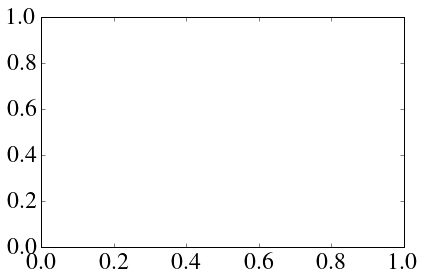

In [2]:
plt.clf()
# http://wiki.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
pts_per_inch=72.27       # this is a latex constant, don't change it.
text_width_in_pts=246.0  # write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
                         # inside a figure environment in latex, the result will be on the dvi/pdf next to the figure. See url above.
text_width_in_inches=text_width_in_pts/pts_per_inch
golden_ratio=0.618       # make rectangles with a nice proportion
inverse_latex_scale=2    # figure.png or figure.eps will be intentionally larger, because it is prettier
                         # when compiling latex code, use \includegraphics[scale=(1/inverse_latex_scale)]{figure}
fig_proportion = (3.0/3.0) # we want the figure to occupy 2/3 (for example) of the text width
csize=inverse_latex_scale*fig_proportion*text_width_in_inches
fig_size=(1.0*csize,golden_ratio*csize)  # always 1.0 on the first argument
fig=plt.figure(1,figsize=fig_size)     # figsize accepts only inches. if you rather think in cm, change the code yourself.
fig.clf()
fig.subplots_adjust(left=0.12, right=0.96,top=0.98, bottom=0.18,hspace=0.00,wspace=0.03)
ax=fig.add_subplot(111)

text_size=inverse_latex_scale*12  # find out the fontsize of your latex text, and put it here
tick_size=inverse_latex_scale*8
# learn how to configure: http://matplotlib.sourceforge.net/users/customizing.html
params = {'backend': 'ps',
          'axes.labelsize': text_size,
          #'axes.linewidth' : 0,
          'text.fontsize': text_size,
          'legend.fontsize': tick_size,
          'legend.handlelength': 3.5,
          'legend.borderaxespad': 0,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'font.family':'serif',
          'font.size': text_size,
          'font.serif':['Times'], # Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

plt.hold('on')
plt.ion()

## the program

In [3]:
def texturize(region, axes, texture,ecolor):
    from matplotlib.patches import PathPatch
    #p.set_facecolors("none")
    for path in region.get_paths():
        p1 = PathPatch(path, fc="none",ec=ecolor, hatch=texture)
        axes.add_patch(p1)
        p1.set_zorder(p.get_zorder()-0.0)

u = np.arange(-2,2,0.01)
delta = np.arange(-0,16,0.01)
a0 = 0
a1 = 0.5

eps_T = delta / (2 - a1 + 2*np.sqrt(1-a1))
eps_H = delta*0 + 1.0/a1

#ax=pylab.subplot(111)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

c = "red"
ax.plot(delta,eps_T,color=c)
p = ax.fill_between(delta, eps_T,y2=0, facecolor='red', alpha=0.0)
texturize(p, ax, "\\",c)
c = "green"
ax.plot(delta,eps_H,color=c)
q = ax.fill_between(delta, eps_H,y2=0, facecolor='green', alpha=0.2)
texturize(q, ax, None,c)

ax.axis([-1.4,15,-0.5,3])
ax.set_xlabel(r'$\delta$')
ax.xaxis.set_label_coords(0.95, 0.1)
ax.set_ylabel(r'$\epsilon$',rotation='horizontal')
ax.yaxis.set_label_coords(0.05,0.95)
ax.set_xticks([(2-a1+2*np.sqrt(1-a1))/a1])
ax.set_xticklabels([r'$\delta_{c2p}$'])
ax.set_yticks([1/a1])
ax.set_yticklabels([r'$1/a_1$'])
ax.legend([r'$\epsilon_T=\frac{\delta}{2-a_1+2\sqrt{1+a_1}}$',r'$\epsilon_H=1/a_1$'], loc="center right")
ax.yaxis.tickspad = -100

fig

In [4]:
# save figure
fig.savefig("textures.png",dpi=300)#,bbox_inches='tight')
fig.savefig("textures.eps")#,bbox_inches='tight') # textures don't work with eps